### Gaussian Tranformation

some machine learning algorithms such as linear regression and naive bayes assumes that the variables are normally distributed to boost up the performace.


### Linear Regression Assumptions
a) Regression assumes that there is little or no Multicollinearity in the data. Multicollinearity occurs when the independent variables are highly correlated with each other.We can check with **correlation matrix** to check if the independent variables are correlated to each other. You can remove one set of the columns which are correlated while keeping the other.

b) Linear Regression assumes that **linear relationship** between independent and dependent variables.

c) It assumes that all variables to be **Multivariate Normal.**

### ML Algorithms doesn't require Gaussian Distribution
* Neural Networks
* Support Vector Machines
* Tree based or ensemble methods.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [2]:
data=pd.read_csv('datasets/titanic.csv',usecols=['Age','Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
df = pd.DataFrame(scaled_data, columns = data.columns)
df.head()

,Survived,Age,Fare
0,0.0,0.271174,0.014151
1,1.0,0.472229,0.139136
2,1.0,0.321438,0.015469
3,1.0,0.434531,0.103644
4,0.0,0.434531,0.015713


In [3]:
data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

### Below is the function to update Na values

### Q-Q plot Function

**Q-Q**(quantile-quantile) Plot is better for visualizing whether feature is ``Gausian Distribution`` or not.

In [4]:
plt.style.use('ggplot')

In [5]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1) #Note that all integers must be less than 10 for this form to work.
    sns.distplot(df[variable])
    
    # Displaying Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()
    


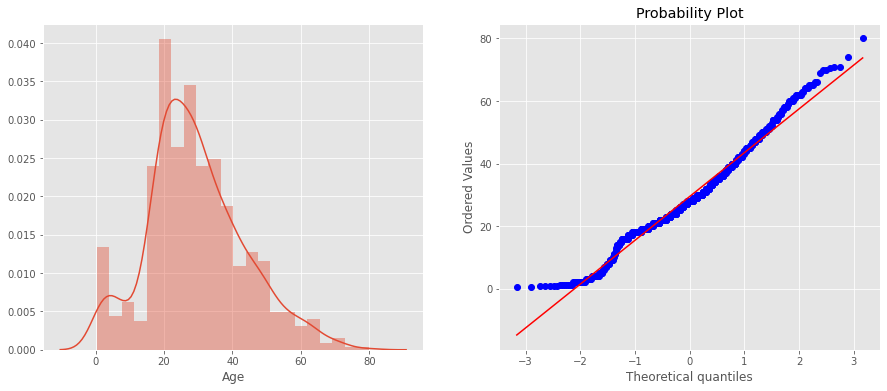

In [6]:
diagnostic_plots(data, 'Age')

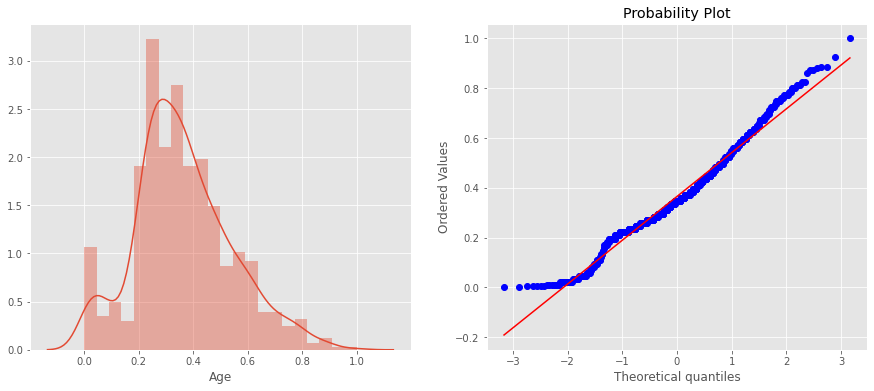

In [7]:
diagnostic_plots(df, 'Age')

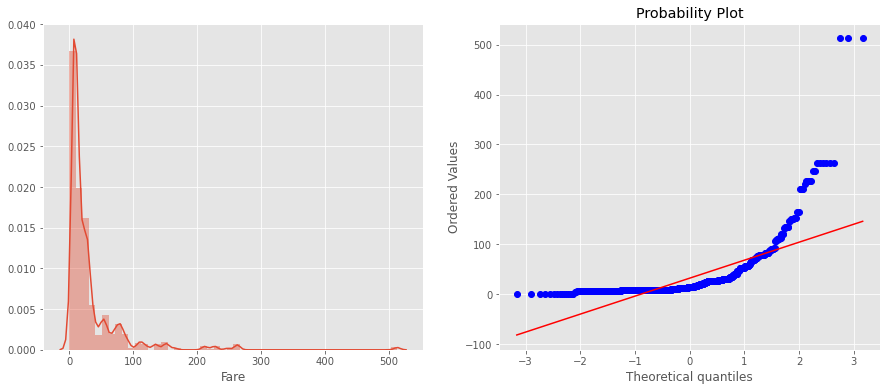

In [10]:
diagnostic_plots(data, 'Fare')
#it is not an Gausian distribution

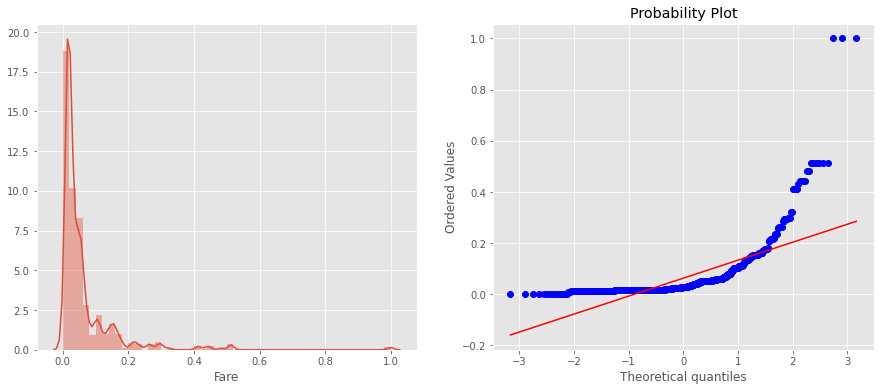

In [12]:
diagnostic_plots(df, 'Fare') #scaled data
#we can observe that there is no difference in plots of both scaled and unscaled data.

### Logarithmic Transformation

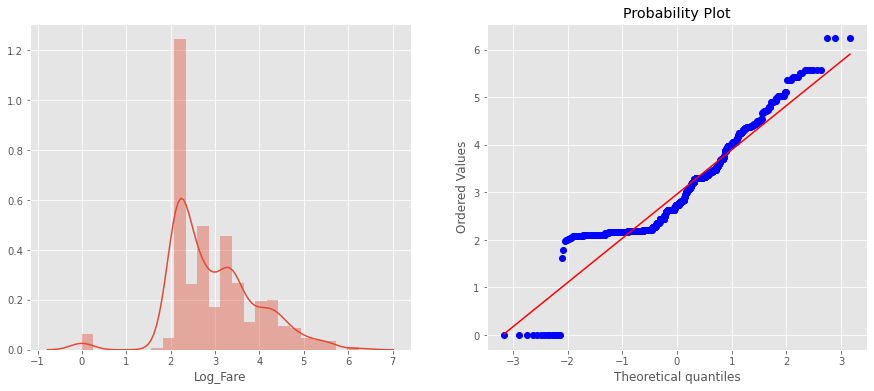

In [11]:
data['Log_Fare']=np.log(data['Fare']+1) 
# if data['Fare']=0, then log(0) is not defined. So we add +1.
diagnostic_plots(data,'Log_Fare')

The logarithmic distribution does a good job in making Fare variable look Gaussian Distributed

### Reciprocal transformation

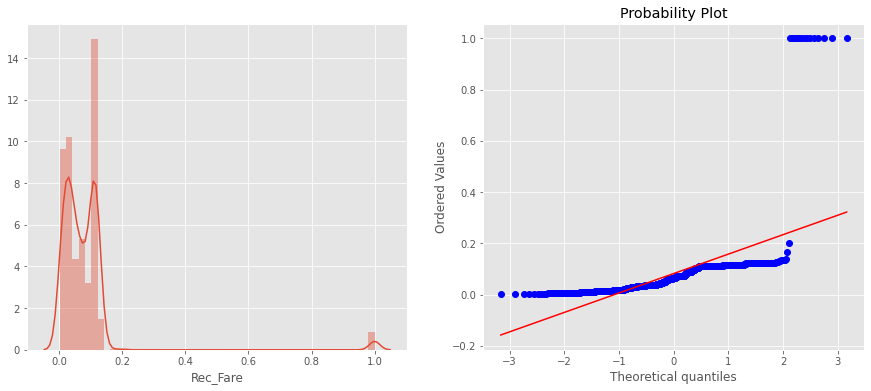

In [12]:
data['Rec_Fare']=1/(data['Fare']+1)
diagnostic_plots(data,'Rec_Fare')

### Sqaure Root Tansformation

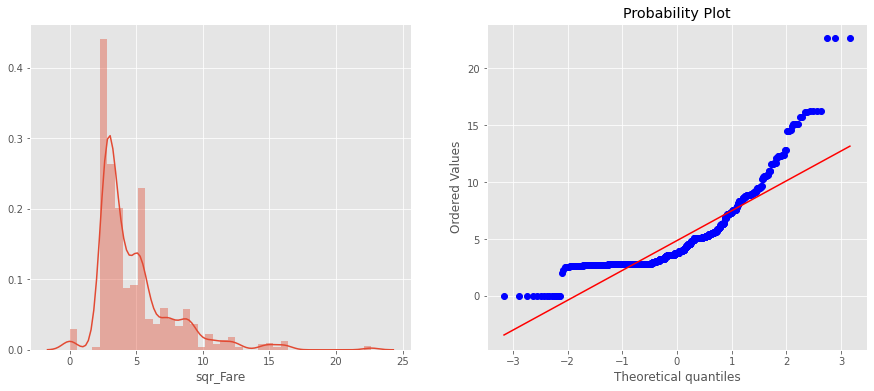

In [13]:
data['sqr_Fare']=data['Fare']**(1/2)
diagnostic_plots(data,'sqr_Fare')

### Exponential Tanformation

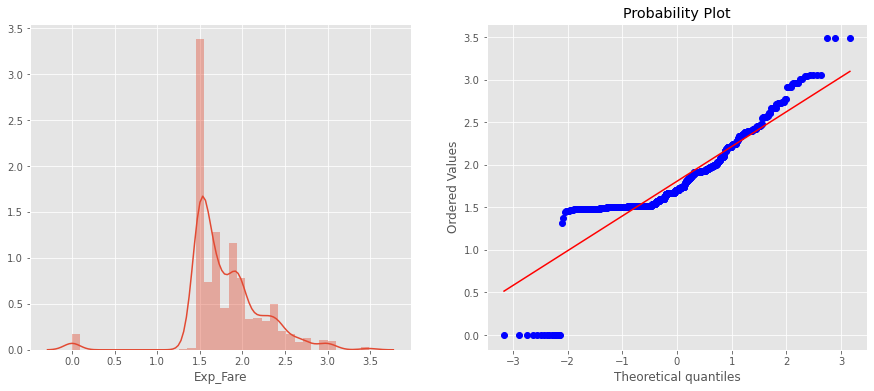

In [14]:
data['Exp_Fare']=data['Fare']**(1/5)
diagnostic_plots(data,'Exp_Fare')

## BoxCox Transform

### Equation:
 T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. **λ** varies from ``-5 to 5``. In the transformation, all values of λ  are considered and the optimal value for a given variable is selected.

### Disadvantage:
  *  Box-Cox requires input data to be strictly ``positive``

Optimal lambda:  -0.09618584667282101


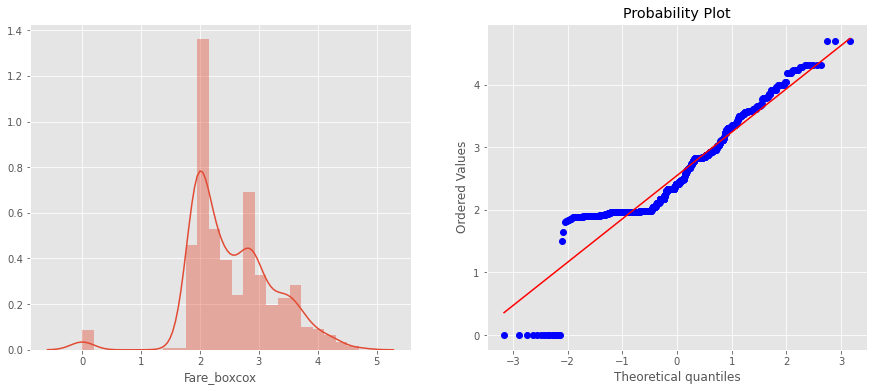

In [15]:
data['Fare_boxcox'], param = stats.boxcox(data.Fare+1) # It returns 2 values...

print('Optimal lambda: ', param)

diagnostic_plots(data, 'Fare_boxcox')

## yeo-johnson Transform

###### (Advanced Version of BOX-COX)

In [16]:
from sklearn.preprocessing import PowerTransformer

# NOTE:
a)Box-Cox requires input data to be strictly ``positive``, while Yeo-Johnson
supports both positive or negative data.

b)PowerTransformer supports the Box-Cox transform and the
Yeo-Johnson transform.

In [17]:
power = PowerTransformer(method = 'yeo-johnson', standardize= False)
reshaped_data = data['Fare'].values.reshape(-1,1)
data_trans = power.fit_transform(reshaped_data)

Here we have to reshape data by ``reshape(-1,1)`` since our data have a single feature(single column). Moreover we are not reshaping out data by reshape(1,-1) as we don't have more than 1 feature in dataset.

In [18]:
data_trans.shape

(887, 1)

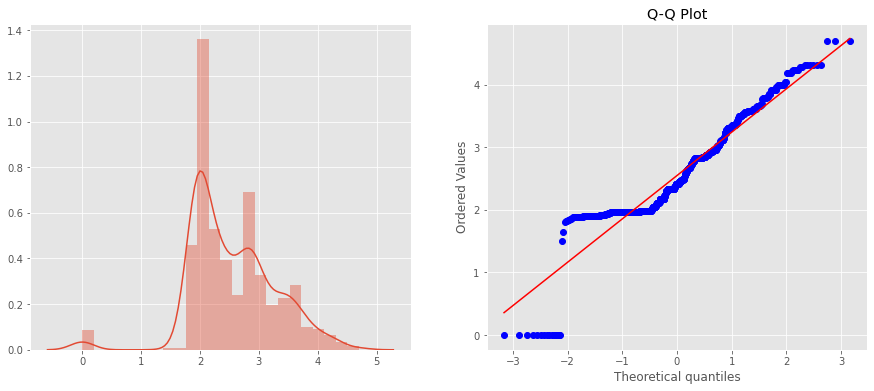

In [21]:
data_trans = data_trans.reshape(887)

plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
sns.distplot(data_trans)

plt.subplot(1, 2, 2)
stats.probplot(data_trans, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()